1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [78]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

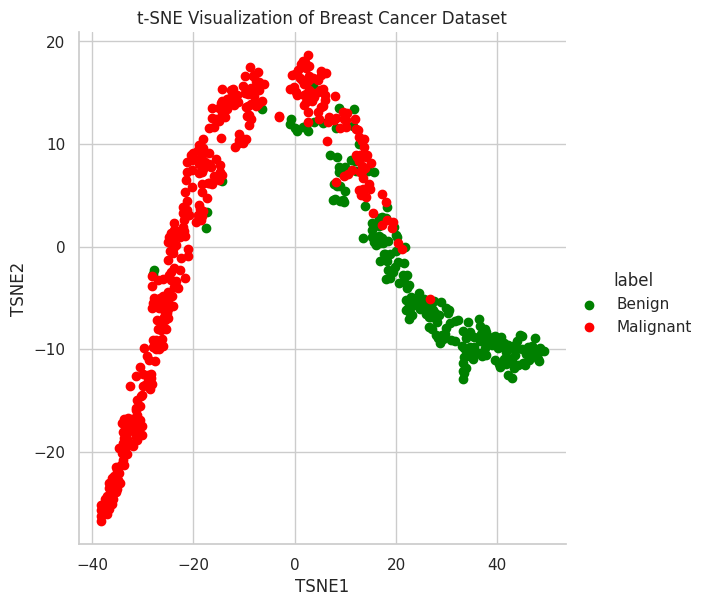

In [79]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting features and targets from the dataset
features = my_data.data
targets = my_data.target

# Applying t-SNE to reduce data to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Creating a DataFrame to hold the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = targets

# Mapping the target labels to meaningful names (Benign and Malignant)
tsne_df['label'] = tsne_df['label'].replace({0: 'Benign' ,1: 'Malignant'})

# Defining the color palette for the two classes
palette = {'Malignant': 'red', 'Benign': 'green'}

# Set the Seaborn style for the plot
sns.set(style="whitegrid")

# Creating a FacetGrid for the scatter plot with hue (color) based on the label (Malignant/Benign)
sns.FacetGrid(tsne_df, hue='label', height=6, palette=palette).\
    map(plt.scatter, 'TSNE1', 'TSNE2').\
    add_legend()

# Adding a title to the plot
plt.title("t-SNE Visualization of Breast Cancer Dataset")
plt.show() # Display the plot


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [80]:

from sklearn.model_selection import train_test_split

X = my_data.data
y = my_data.target

# X_train, X_test, Y_train, Y_test = train_test_split(...)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)




4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [81]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,random_state=42)
# model_decision_tree = DecisionTreeClassifier(...)
model_decision_tree.fit(X_train, y_train)
# model_decision_tree.fit(...)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)



```
# This is formatted as code
```

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [82]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
model_random_forest = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=42)
# model_random_forest.fit(...)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=20, random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [83]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
model_adaboost = AdaBoostClassifier(n_estimators = 275, learning_rate = 0.7, algorithm ='SAMME.R', random_state = 42)
# model_adaboost.fit(...)
model_adaboost.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.7, n_estimators=275, random_state=42)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Function to evaluate models based on various metrics
def evaluate_model(model, X_test, y_test, name):

    # Predict the target variable using the trained model on the test data
    y_pred = model.predict(X_test)

    # Calculate various evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the evaluation results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:")
    print(conf_matrix)

    # Return the results as a dictionary
    return {"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Evaluate Decision Tree
results_decision_tree = evaluate_model(model_decision_tree, X_test, y_test, "Decision Tree")

# Evaluate Random Forest
results_random_forest = evaluate_model(model_random_forest, X_test, y_test, "Random Forest")

# Evaluate AdaBoost
results_adaboost = evaluate_model(model_adaboost, X_test, y_test, "AdaBoost")

# Collecting all the results from the models into a list
results = [
    results_decision_tree,
    results_random_forest,
    results_adaboost
]

# Creating a DataFrame to compare the models
results_df = pd.DataFrame(results)

# Print the comparison of all models
print(f"\nComparison of Models:")
print(results_df)

# Deciding on the best model based on the F1 Score
decisive_metric = "F1 Score"
best_model = results_df.loc[results_df[decisive_metric].idxmax()]

# Print the winner model and its corresponding F1 Score
print(f"\nThe winner is {best_model['Model']} with the highest {decisive_metric}: {best_model[decisive_metric]:.6f}")


Results for Decision Tree:
Accuracy: 0.96
Precision: 0.98
Recall: 0.95
F1 Score: 0.97
Confusion Matrix:
[[ 65   2]
 [  6 115]]

Results for Random Forest:
Accuracy: 0.98
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
Confusion Matrix:
[[ 64   3]
 [  1 120]]

Results for AdaBoost:
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.99
Confusion Matrix:
[[ 66   1]
 [  2 119]]

Comparison of Models:
           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.957447   0.982906  0.950413  0.966387
1  Random Forest  0.978723   0.975610  0.991736  0.983607
2       AdaBoost  0.984043   0.991667  0.983471  0.987552

The winner is AdaBoost with the highest F1 Score: 0.987552
